In [1]:
from matplotlib import pyplot as plt
import numpy as np

### 각 모델 5개 검증정확도 추출

In [149]:
acc_list = []
f = open("../training_memo/single_1000epoch/1-single_1000epoch.out", 'r', encoding="utf-8")
while True:
    line = f.readline()
    if line[:6] == '검증 정확도':
        acc_list.append(line[7:12])
    if not line: break
acc_list1 = list(map(float, acc_list))
f.close()

acc_list = []

f = open("../training_memo/single_1000epoch/2-single_1000epoch.out", 'r', encoding="utf-8")
while True:
    line = f.readline()
    if line[:6] == '검증 정확도':
        acc_list.append(line[7:12])
    if not line: break
acc_list2 = list(map(float, acc_list))
f.close()

acc_list = []

f = open("../training_memo/single_1000epoch/3-single_1000epoch.out", 'r', encoding="utf-8")
while True:
    line = f.readline()
    if line[:6] == '검증 정확도':
        acc_list.append(line[7:12])
    if not line: break
acc_list3 = list(map(float, acc_list))
f.close()

acc_list = []

f = open("../training_memo/single_1000epoch/4-single_1000epoch.out", 'r', encoding="utf-8")
while True:
    line = f.readline()
    if line[:6] == '검증 정확도':
        acc_list.append(line[7:12])
    if not line: break
acc_list4 = list(map(float, acc_list))
f.close()

acc_list = []

f = open("../training_memo/single_1000epoch/5-single_1000epoch.out", 'r', encoding="utf-8")
while True:
    line = f.readline()
    if line[:6] == '검증 정확도':
        acc_list.append(line[7:12])
    if not line: break
acc_list5 = list(map(float, acc_list))
f.close()

In [150]:
acc_list1 = np.array(acc_list1)
acc_list2 = np.array(acc_list2)
acc_list3 = np.array(acc_list3)
acc_list4 = np.array(acc_list4)
acc_list5 = np.array(acc_list5)

In [151]:
len(acc_list5)

1000

### 5개 모델 평균 정확도

In [152]:
results = acc_list1 + acc_list2 + acc_list3 + acc_list4 + acc_list5
results = results / 5

f = open('../training_memo/get_avg(single_1000epoch).txt', 'w')

for i in range(1000):
    score = round(results[i], 3)
    f.write(str(score))
    f.write('\n')
f.close()

### 10 epoch 마다

In [28]:
n_acc_list1 = []
n_acc_list2 = []
n_acc_list3 = []
n_acc_list4 = []
n_acc_list5 = []

for i in range(1000):
    if i % 10 == 0:
        n_acc_list1.append(acc_list1[i])
        n_acc_list2.append(acc_list2[i])
        n_acc_list3.append(acc_list3[i])
        n_acc_list4.append(acc_list4[i])
        n_acc_list5.append(acc_list5[i])
    

### 각 모델 정확도 그래프 출력

In [37]:
len(n_acc_list1[:20])

20

In [51]:
c = np.arange(1, 11, step=1)
c

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### 10 epoch 마다

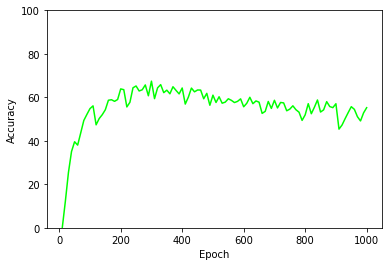

In [56]:
x_values = np.arange(10, 1010, 10)

plt.plot(x_values, n_acc_list5, color="lime")
# plt.scatter(x_values, n_acc_list1, c = '#ff7f0e')
# plt.legend(['Soft Voting'])
plt.ylim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('PlusMinus Accuracy')
# plt.savefig('Single-1.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

### 모든 모델 정확도 비교

In [2]:
x_values = np.arange(200)
f = open("../training_memo/get_avg(esb_soft).txt", 'r')
f1 = open("../training_memo/get_avg(survival).txt", 'r')
f2 = open("../training_memo/get_avg(real).txt", 'r')
f3 = open("../training_memo/get_avg(single).txt", 'r')
# f4 = open("../training_memo/get_avg(single_1000epoch).txt", 'r')


esb_lines = f.readlines()
sur_lines = f1.readlines()
real_lines = f2.readlines()
single_lines = f3.readlines()
# single2_lines = f4.readlines()

f.close()
f1.close()
f2.close()
f3.close()
# f4.close()

esb_list = list(map(float, esb_lines))
sur_list = list(map(float, sur_lines))
real_list = list(map(float, real_lines))
single_list = list(map(float, single_lines))
# single2_list = list(map(float, single2_lines))

### 10 epoch 마다

In [3]:
n_esb_list = []
n_sur_list = []
n_real_list = []
n_single_list = []
n_single_list2 = []



for i in range(200):
    if i % 10 == 0:
        n_esb_list.append(esb_list[i])
        n_sur_list.append(sur_list[i])
        n_real_list.append(real_list[i])
        n_single_list.append(single_list[i])
        
# for i in range(1000):
#     if i % 10 == 0:
#         n_single_list2.append(single2_list[i])
        


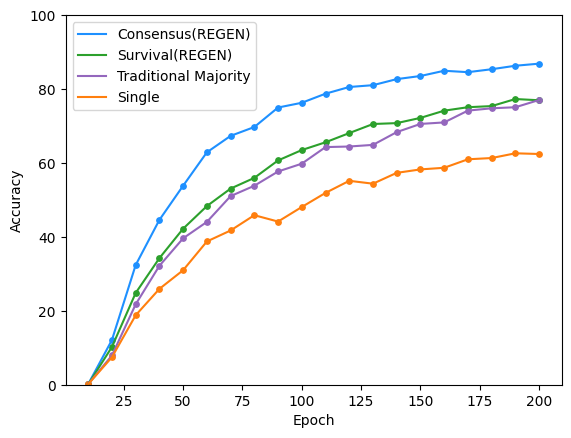

In [4]:
# x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
x_values = np.arange(10, 210, 10)
x_values2 = np.arange(10, 1010, 10)
plt.plot(x_values, n_esb_list, color = "dodgerblue", label='Consensus(REGEN)')
plt.scatter(x_values, n_esb_list, c = 'dodgerblue', s=15)
plt.plot(x_values, n_sur_list, color = "#2ca02c", label='Survival(REGEN)')
plt.scatter(x_values, n_sur_list, c = '#2ca02c', s=15)
plt.plot(x_values, n_real_list, color = "#9467bd", label='Traditional Majority')
plt.scatter(x_values, n_real_list, c = '#9467bd', s=15)
plt.plot(x_values, n_single_list, color = "#ff7f0e", label='Single')
plt.scatter(x_values, n_single_list, c = '#ff7f0e', s=15)
# plt.plot(x_values2, n_single_list2, color = "lime")
# plt.scatter(x_values2, n_single_list2, c = 'lime', s=15)

plt.legend(loc='best') 
plt.ylim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('PlusMinus Accuracy')
plt.savefig('compare_Accuacy.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
